## Ildebrando Magnani

im975

N16654444

Final Project: In this notebook we numerically solve the economic model presented in the paper "On the Behaviour of Commodity Prices" by A. Deaton, G. Laroque.

## The Model:

The setting distinguishes two types of agent, producer-consumers and speculators. Producer-consumers generate demand quantity $D(p_t)$, where $p_t$ is the price at time $t$. We will denote as $P := D^{-1}$ the inverse demand function, and as $z_t$ the amount of commodity that is randomly and inelastically supplied at time $t$, call it the "harvest".

* ASSUMPTION 1: The "harvest" random variables $z_t$ are i.i.d. and distributed according to the density $\phi$. The harvest takes values on a compact support, which has lower bound $\underline{z}$ and upper bound $\bar{z}$. $D(p)$ is defined on $(0, + \infty)$, it's continuous, decreasing and it tends to $+\infty$ as $p$ tends to zero. The inverse demand function $P(z)$ satisfies the condition $\infty > P(\underline{z}) > 0$. 

In absence of inventories, and given the i.i.d. assumption for $z_t$, the prices will also be i.i.d., i.e., $p_t = P(z_t)$. Introducing inventories at time t as $I_t$ means that this will no longer be true. Suppose that speculators - who hold inventories $I_t$ - are risk-neutral and can borrow from a perfect capital market where the risk-free interest rate is $r \in (0, 1)$. Also suppose that they can access to a constant return storage technology such that one unit of commodity stored at period $t$ gives $\alpha \in (0,1)$ units at $t+1$. 

* ASSUMPTION 2: Let $\beta = 1 / (1+r)$. Then, the real cost of holding inventories is: $\beta \alpha = \alpha \ (1+r) < 1$.

Let $E_t p_{t+1}$ be the expected value of $p_t+1$ conditional on the information available at $t$. Speculators who carried an inventory $I_t$ into the following period have an expected profit of $[\beta \alpha \mathbb{E}_t p_{t+1} - p_t] I_t$. The non-arbitrage condition imposes that 

\begin{equation}
\beta \alpha \mathbb{E}_t p_{t+1} - p_t \leq 0
\end{equation}

therefore, profit maximization gives 

\begin{equation}
I_t=0 \quad if \quad \beta \alpha \mathbb{E}_t p_{t+1} < p_t \\
I_t \geq 0 \quad if \quad \beta \alpha \mathbb{E}_t p_{t+1} = p_t .
\end{equation}







At each period, $x_t$ is the total supply of the commodity, and it's composed of the stochastic harvest plus the leftover inventories from the previous period, i.e., $x_t = z_t + \alpha I_{t-1}$. In equilibrium, demand (which includes demand for inventories) must equal supply, thus

\begin{equation} 
z_t + \alpha I_{t-1} - I_t = D(p_t).
\end{equation}

By combining non-arbitrage, profit maximization and equilibrium we obtain

\begin{equation}
p_t = \max [\: \beta \alpha \mathbb{E}_t p_{t+1}, \: P\{z_t + \alpha I_{t-1}\}].
\end{equation}


A Stationary Rational Expectations Equilibrium (SREE) consists in a price function $\:$ $p^{*}:[\underline{z}, \infty] \rightarrow \mathbb{R}$ $\:$ which satisfies the functional equation 

\begin{equation}
p^*(x) = \max [\: \beta \alpha \mathbb{E} p^*\{z + \alpha (x - P^{-1}\{p^*(x)\})\}, \: P(x) \:]
\end{equation}

with expectation taken with respect to $z$, and where $x - P^{-1}\{f(x)\} = I$.



## Computing the Equilibrium Pricing Function:

Now I turn to the essential facts that will be useful to compute the price function $p^*$ described above. First, let $\mathcal{L}$ be the set of decreasing continuous functions $p: [\underline{z}, \infty] \rightarrow \mathbb{R}$, with $p \geq P$ for every $x \in [\underline{z}, \infty]$, then the metric space $(\mathcal{L}, d_{\infty})$ is complete. Second, consider the operator $T$ that - for a given $p \in \mathcal{L}$ - associates to each $x \in [\underline{z}, \infty]$ a real number $r$ which satisfies

\begin{equation}
r = \max  \left[ \beta \alpha\int p(\alpha (x- D(r)) + z) \phi(z) dz, \: P(x) \right] = Tp(x)
\end{equation}

where $\phi$ is the density of $z_t$. Then, the operator $T$ is well defined for each $p$ and $x$ and it satisfies the following: 

\begin{equation}
P(x) \leq Tp(x) \leq v(x) = \max \left[ \beta \alpha \int p(z) \phi(z) dz, \: P(x) \right].
\end{equation}

Furthermore, $T$ maps $\mathcal{L}$ into $\mathcal{L}$ and it is uniformly contracting on $(\mathcal{L}, d_{\infty})$. Thus, Banach Contraction Mapping Theorem can be applied to show that there exists a unique $p^*$ such that for every p $\in \mathcal{L}$, we have $d_{\infty}(T^n p, p^*) \rightarrow 0$ as $n \rightarrow \infty$.



From above, it follows also that 

\begin{equation}
Tp(x) = \beta \alpha\int p(\alpha (x- D(r)) + z) \phi(z) dz, \quad if \quad \beta \alpha \int p(z) \phi(z) dz > P(x) \\
Tp(x) = P(x), \quad if \quad  \beta \alpha \int p(z) \phi(z) dz \leq P(x),
\end{equation}

a result that indicates an algorithm to compute $p^*$ by iterating on the operator $T$.

## The Stationary Density:

Once the equilibrium pricing function $p^*$ is found, and given an initial condition for $x_t$, it is possible to simulate a time series of prices satisfying 

\begin{equation}
p_t = p^*(x_t); \quad \quad \quad x_{t+1} = \alpha I_t + z_{t+1}, 
\end{equation}

where $I_t = x_t - D(p^*(x_t))$. Let the density of $x_t$ be denoted by $\psi_t$, for all $t$ $\geq$ 1. Then, $\psi_{t+1}$ satisfies $\psi_{t+1}(y) = \int p(x,y)\psi_t(x) dx$, with $p(x,y) = \phi(y - \alpha I(x))$ and $y$ in the state space ($\phi$ is the density of the harvest). To compute the stationary density $\psi^*$of $x_t$, it is possible to implement the look-ahead estimator defined as 

\begin{equation}
\psi^*_n(y) = \frac1{n} \sum_{t=1}^n \phi(x_t, y),
\end{equation}

where $(x_t)_{t=1}^n$ are observations of a simulated time series of size $n$. 

Let us begin with the code.

I'm going to compute the equilibrium pricing function for three different sets of primitives specifications (demand function, harvest distribution, risk-free rate, storage technology):

* Model 0: $\:$ $P(x)= d + f x$, $\quad$ $z_t$ is $N(\mu=100, \sigma=10)$; $\quad$ $d=200, \: f=-1, \: r=0.056,\: \alpha=0.95$

* Model 1: $\:$ $P(x)= \frac1{x^{\rho}}$, $\quad$ $z_t$ is $LogN(\mu=0, \sigma=0.5)$; $\quad$ $r=0.056,\: \alpha=0.95, \: \rho =8$

* Model 2: $\:$ $P(x)= \frac1{x^{\rho}}$, $\quad$ $z_t = a + b W_t$, where $W_t$ is a beta distribution $\beta(5, 5)$; $\quad$ $a=5, \: b=2, \:r=0.0,\: \alpha=0.8, \: \rho =1$

In [1]:
# import libraries
% matplotlib inline
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import scipy.stats as stat
from scipy import integrate
import scipy

In [2]:
time = np.linspace(0, 200, 200)

In [3]:
# Model0 primitives
alpha0 = 0.95   # storage technology
r0 = 0.56       #risk-free rate of interest
beta0 = 1 / (1 + r0)    #discount factor

gridmin0 = 20
gridmax0 = 500
gridsize0 = 500
grid0 = np.linspace(gridmin0, gridmax0, gridsize0)     #grid we will use to evaluate operator T

d, f = 200, -1
D0 = lambda x: -(d/f) + (x/f)          #demand function
P0 = lambda x: d + f * x             #inverse demand function

#normally distributed shock draws (mean=100, std=10)
W_norm = stat.norm.rvs(loc=100, scale=40, size=1000)    
norm_density = lambda x: stat.norm.pdf(x, loc=100, scale=10)   #normal density
norm_instance = lambda: stat.norm.rvs(loc=100, scale=10, size=1)   #single shock draw

In [4]:
# Model1 set of primitives
alpha1 = 0.95
r1 = 0.56
beta1 = 1 / (1 + r1)

gridmin1 = 0.1
gridmax1 = 35
gridsize1 = 200
grid1 = np.linspace(gridmin1, gridmax1, gridsize1)

rho0 = 8.0
D1 = lambda x: 1.0 / x**(1 / rho0)
P1 = lambda x: 1.0 / x**(rho0)

#parameters are taken from the underlying normal
W_lognorm = stat.lognorm.rvs(s=0.1, scale=1, size=1000)   
lognorm_density = lambda x: stat.lognorm.pdf(x, s=0.5, scale=1)
lognorm_instance = lambda: stat.lognorm.rvs(s=0.5, scale=1, size=1)

In [5]:
# Model2 set of primitives
alpha2 = 0.8
r2 = 0.0
beta2 = 1 / (1 + r2)

gridmin2 = 0.01
gridmax2 = 35
gridsize2 = 1000
grid2 = np.linspace(gridmin2, gridmax2, gridsize2)

rho1 = 1.0
D2 = lambda x: 1.0 / x**(1 / rho1)
P2 = lambda x: 1.0 / x**(rho1)

a, c = 5.0, 2.0         #loc and scale account for the shifted beta
W_beta = stat.beta.rvs(a=5, b=5, loc=a, scale=c, size=1000)
beta_density = lambda x: stat.beta.pdf(x, a=5, b=5, loc=a, scale=c)
beta_instance = lambda: stat.beta.rvs(a=5, b=5, loc=a, scale=c, size=1)

In [6]:
def bisection(f, low_bound, upp_bound, tol=1e-8, rtol=1e-8): 
    inf = low_bound                                          
    sup = upp_bound
    while sup - inf > tol:                      #implementing a standard bisection algorithm
        star = (sup + inf) * 0.5                #(brentq sometimes fails)
        if np.abs(f(star)) < rtol:
            return star
        elif np.sign(f(star)) == np.sign(f(inf)):
            inf = star
        elif np.sign(f(star)) == np.sign(f(sup)):
            sup = star
    return (inf + sup) * 0.5

In [7]:
#find fixed point of a single valued function, i.e., x s.t. g(x)=x
def fixed_point(g, lower_b, upper_b):   
    return bisection(lambda x: x - g(x), lower_b, upper_b)

In [8]:
#function that evaluates T operator given x in state space
def T_operator(p, x, W, beta, alpha, P, D):   
    v = beta * alpha * np.mean(p(W))  #using Monte-Carlo integration to evaluate v(x) 
    if v <= P(x):
        return P(x)
    h = lambda t: beta * alpha * np.mean(p(alpha*(x - D(t)) + W)) 
    return fixed_point(h, P(x), v)

In [9]:
def T_operator_interpolated(p, W, beta, alpha, P, D, grid): #interpolates T operator 
    new_p = np.empty_like(grid)  #empty array
    for i, x in enumerate(grid):   #for each point in the grid
        #evaluates T and store the value in array new_p
        new_p[i] = T_operator(p, x, W, beta, alpha, P, D)   
    interp_new_p = lambda x: np.interp(x, grid, new_p)  #interpolates T
    return interp_new_p

In [10]:
#iterate T operator until some stopping condition is satisfied to find p_star
def compute_pricing_function(p, W, beta, alpha, P, D, grid, tol=1e-10, max_iter=1000):
    #plot the price function without Inventories
    plt.plot(grid, P(grid), label="With no inventories")    
    i = 0
    while i < max_iter:
        #evaluate T on grid and interpolate
        p_new = T_operator_interpolated(p, W, beta, alpha, P, D, grid) 
        error = np.amax(np.abs(p_new(grid) - p(grid)))   #evaluate absolute distance
        if i == 0:   
            #plot the first iteration, i.e., Tp(x)
            plt.plot(grid, p_new(grid), label="Tp (first iteration)") 
        if error < tol:   #stopping condition
            break
        p = p_new     #repeat
        i +=1
    plt.plot(grid, p_new(grid), label="With optimal inventories")     #plot p_star
    plt.legend(loc='upper right')
    plt.xlabel("amount at hand")
    plt.ylabel("Current Price")
    return p_new

In [11]:
class stochastic_rec:     #define class for time series simulator
    
    def __init__(self, f=None, X=None, shock=None):
        self.f, self.X, self.shock = f, X, shock
        
    def next(self): #define method that updates the time series
        self.X = self.f(self.X, self.shock())
    
    #method that loops and generates the time series observations  
    def recursion_sample(self, N):   
        X_t = np.empty(N)    #empty array of size N observations
        for i in range(N):
            X_t[i] = self.X    # store value in X_t array
            self.next()    #updating
        return X_t    #return array of obs

In [12]:
#look-ahead estimator to find stationary pdf
def look_ahead_est(kernel, I_t, gridmin, gridmax, alpha): 
    #grid on which we will evaluate the estimator
    xx = np.linspace(gridmin, gridmax, 2000)   
    stationary = np.empty_like(xx)   #empty array to store values for the stationary pdf
    for i, y in enumerate(xx):    #loop over y in grid
        stationary[i] = np.mean(kernel(y - alpha * I_t)) #evaluate look-ahead estimator at y
        stationary_interp = lambda x: interp(x, xx, stationary) #interpolate estimator
    return stationary_interp    #returns interpolator

* Model 0 results: $\:$ $P(x)= d + f x$, $\quad$ $z_t$ is $N(\mu=100, \sigma=10)$; $\quad$ $d=200, \: f=-1, \: r=0.056,\: \alpha=0.95$

(0, 140)

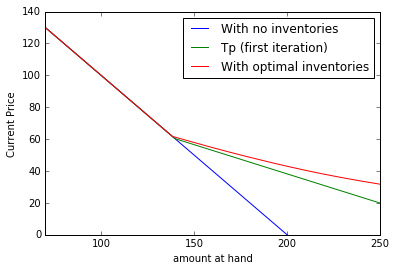

In [13]:
p_star0 = compute_pricing_function(P0, W_norm, beta0, alpha0, P0, D0, grid0)#find eq. price fn

#define law of motion for time series generator
motion0 = lambda x, w: alpha0 * (x - D0(p_star0(x))) + w 

plt.xlim(70, 250)
plt.ylim(0, 140)

In [14]:
deaton_recursion = stochastic_rec(f=motion0, X=100.0, shock=norm_instance)
#get a time series sample of size 12000 for x_t
X0 = deaton_recursion.recursion_sample(12000)   
I0 = X0 - D0(p_star0(X0))   #compute Iventories time series I_t
#compute stationary pdf
stationary0 = look_ahead_est(norm_density, I0, gridmin0, gridmax0, alpha0) 

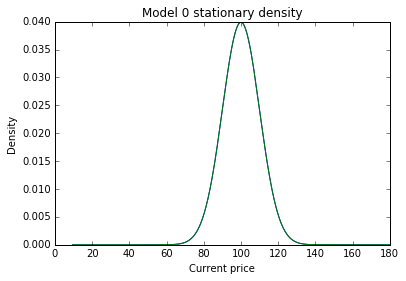

In [15]:
gridd0 = np.linspace(gridmin0, gridmax0, 3000)  
p_grid0 = p_star0(gridd0) # grid of prices
plt.plot(p_grid0, stationary0(p_grid0)) #plotting stationary pdf
plt.plot(p_grid0, norm_density(p_grid0))

plt.xlim()
plt.ylim()
plt.title("Model 0 stationary density")
plt.xlabel("Current price")
plt.ylabel("Density")

* Model 1 results: $\:$ $P(x)= \frac1{x^{\rho}}$, $\quad$ $z_t$ is $LogN(\mu=0, \sigma=0.5)$; $\quad$ $r=0.056,\: \alpha=0.95, \: \rho =8$

(0, 0.1)

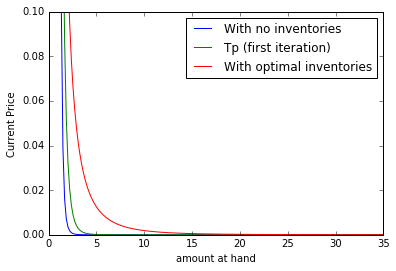

In [16]:
p_star1 = compute_pricing_function(P1, W_lognorm, beta1, alpha1, P1, D1, grid1)

motion1 = lambda x, w: alpha1 * (x - D1(p_star1(x))) + w

plt.xlim()
plt.ylim(0, 0.1)

In [17]:
deaton_recursion = stochastic_rec(f=motion1, X=1.0, shock=lognorm_instance)
X1 = deaton_recursion.recursion_sample(100000)
I1 = X1 - D1(p_star1(X1))
stationary1 = look_ahead_est(lognorm_density, I1, gridmin1, gridmax1, alpha1)

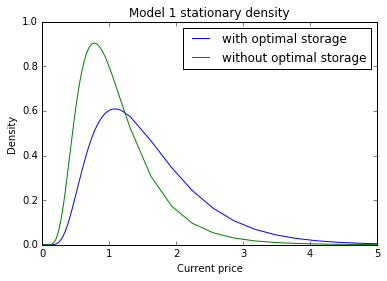

In [18]:
gridd1 = np.linspace(gridmin1, gridmax1, 3000)
p_grid1 = p_star1(gridd1)
plt.plot(p_grid1, stationary1(p_grid1), label="with optimal storage")
plt.plot(p_grid1, lognorm_density(p_grid1), label="without optimal storage")


plt.xlim(0, 5)
plt.ylim()
plt.title("Model 1 stationary density")
plt.xlabel("Current price")
plt.ylabel("Density")
plt.legend()

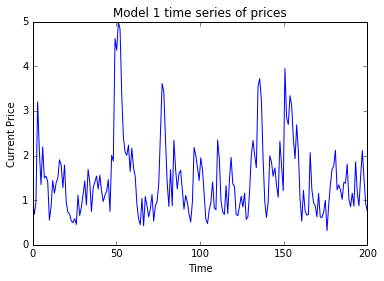

In [19]:
plt.plot(time, X1[99800:100000,])
plt.title("Model 1 time series of prices")
plt.xlabel("Time")
plt.ylabel("Current Price")

* Model 2 results: $\:$ $P(x)= \frac1{x^{\rho}}$, $\quad$ $z_t = a + b W_t$, where $W_t$ is a beta distribution $\beta(5, 5)$; $\quad$ $a=5, \: b=2, \:r=0.0,\: \alpha=0.8, \: \rho =1$

(0, 0.25)

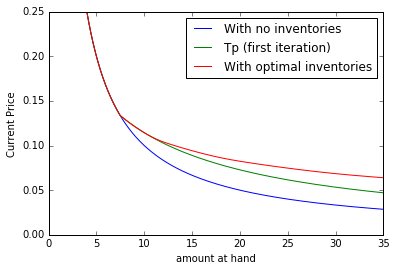

In [20]:
p_star2 = compute_pricing_function(P2, W_beta, beta2, alpha2, P2, D2, grid2)

motion2 = lambda x, w: alpha2 * (x - D2(p_star2(x))) + w

plt.xlim()
plt.ylim(0, 0.25)

In [21]:
deaton_recursion = stochastic_rec(f=motion2, X=5.0, shock=beta_instance)
X2 = deaton_recursion.recursion_sample(120000)
I2 = X2 - D2(p_star2(X2))
stationary2 = look_ahead_est(beta_density, I2, gridmin2, gridmax2, alpha2)

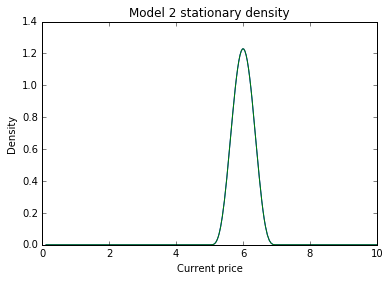

In [22]:
gridd2 = np.linspace(0.001, 10, 10000)
p_grid2 = p_star2(gridd2)
plt.plot(p_grid2, stationary2(p_grid2))
plt.plot(p_grid2, beta_density(p_grid2))

plt.xlim(0, 10)
plt.ylim()
plt.title("Model 2 stationary density")
plt.xlabel("Current price")
plt.ylabel("Density")

## References:


* On the Behaviour of Commodity Prices, A. Deaton, G. Laroque, The Review of Economic Studies, 1992.

* Economic Dynamics, Theory and Computation, J. Stachurski, MIT Press, 2009.